[0]


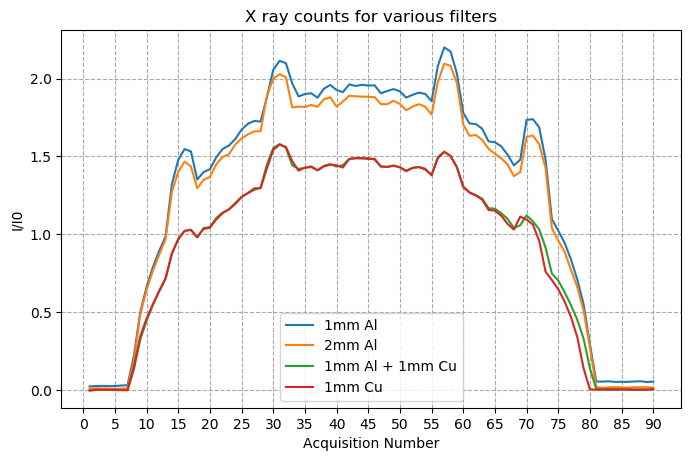

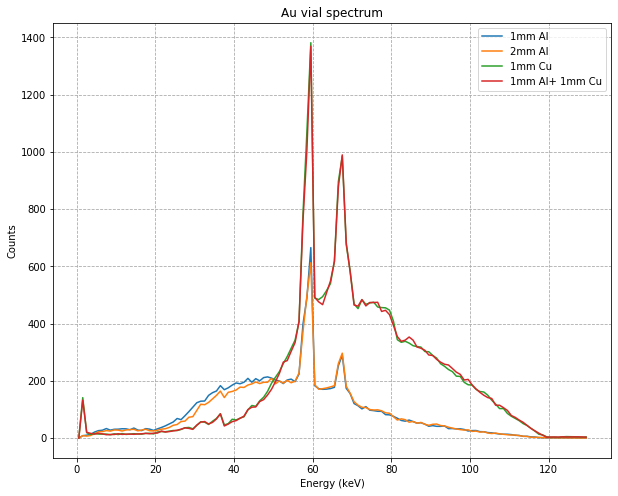

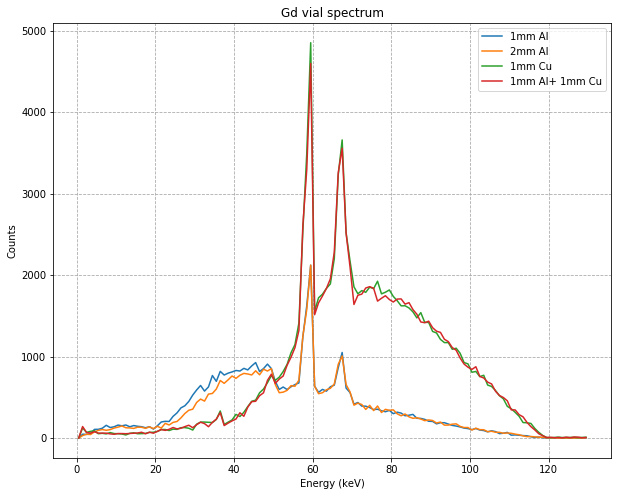

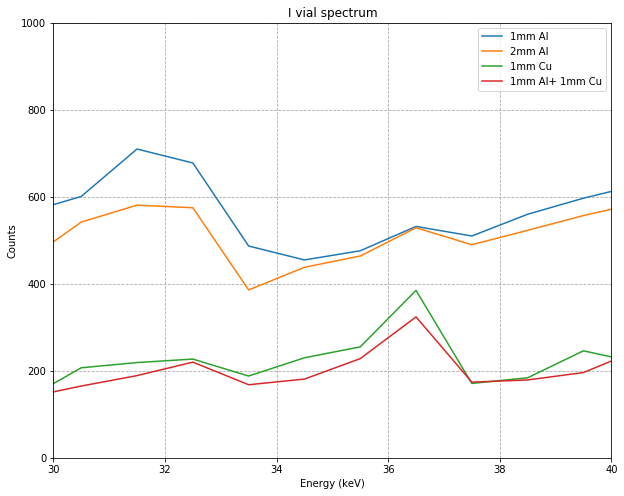

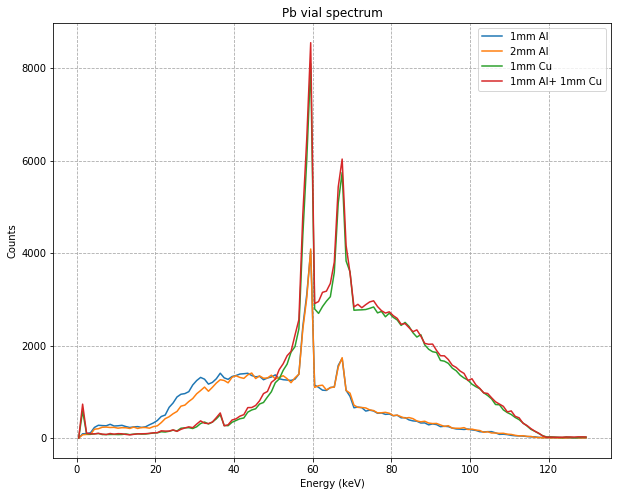

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
from matplotlib.pyplot import figure
from skimage.transform import iradon
import matplotlib
import astra

bin_width=120
bins=np.arange(0,120,bin_width)
print(bins)


airscan_1mmAl= [sum(genfromtxt("Desktop/CT imaging/7-6-2021/Air scan 1mm Al.mca", skip_header=int(round(i*402/59.3+12)),max_rows=int(round(bin_width*402/59.3)))) for i in bins]
airscan_2mmAl= [sum(genfromtxt("Desktop/CT imaging/7-6-2021/Air scan 2mm Al.mca", skip_header=int(round(i*402/59.3+12)),max_rows=int(round(bin_width*402/59.3)))) for i in bins]
airscan_1mmAlCu= [sum(genfromtxt("Desktop/CT imaging/7-6-2021/Air scan 1mm Al + Cu.mca", skip_header=int(round(i*402/59.3+12)),max_rows=int(round(bin_width*402/59.3)))) for i in bins]
airscan_1mmCu=[sum(genfromtxt("Desktop/CT imaging/7-6-2021/Air scan 1mm Cu.mca", skip_header=int(round(i*402/59.3+12)),max_rows=int(round(bin_width*402/59.3)))) for i in bins]

Al1mm= []
avg_counts=[]
for k in np.arange(0,len(bins)):
    for i in np.arange(1,91):
        counts = genfromtxt("Desktop/CT imaging/7-6-2021/1mm_Al_acq{:02d}.mca".format(i), skip_header=int(round(bins[k]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3)))
        avg_counts.append(-np.log(sum(counts)/airscan_1mmAl[k]))
        counts=0
    Al1mm.append(avg_counts)
    avg_counts=[]
    
Al2mm= []
tot_counts=[]
for k in np.arange(0,len(bins)):
    for i in np.arange(1,91):
        counts = genfromtxt("Desktop/CT imaging/7-6-2021/2mm_Al_acq{:02d}.mca".format(i), skip_header=int(round(bins[k]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3)))
        avg_counts.append(-np.log(sum(counts)/airscan_2mmAl[k]))
        counts=0
    Al2mm.append(avg_counts)
    avg_counts=[]
    
Cu1mm= []
tot_counts=[]
for k in np.arange(0,len(bins)):
    for i in np.arange(1,91):
        counts = genfromtxt("Desktop/CT imaging/7-6-2021/1mm_Cu_acq{:02d}.mca".format(i), skip_header=int(round(bins[k]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3)))
        avg_counts.append(-np.log((sum(counts)/airscan_1mmCu[k])))
        counts=0
    Cu1mm.append(avg_counts)
    avg_counts=[]

AlCu1mm= []
tot_counts=[]
for k in np.arange(0,len(bins)):
    for i in np.arange(1,91):
        counts = genfromtxt("Desktop/CT imaging/7-6-2021/1mm_AlCu_acq{:02d}.mca".format(i), skip_header=int(round(bins[k]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3)))
        avg_counts.append(-np.log(sum(counts/airscan_1mmAlCu[k])))
        counts=0
    AlCu1mm.append(avg_counts)
    avg_counts=[]
    
    
x= np.arange(1,91)

figure(2,figsize=(8, 5), dpi=100)
plt.plot(x,Al1mm[0],label='1mm Al')
plt.plot(x,Al2mm[0],label='2mm Al')
plt.plot(x,AlCu1mm[0],label='1mm Al + 1mm Cu')
plt.plot(x,Cu1mm[0],label='1mm Cu')
plt.legend()
plt.xlabel('Acquisition Number')
plt.ylabel('I/I0')
plt.title('X ray counts for various filters')
plt.grid(color='darkgrey',linestyle='--')
plt.locator_params(axis="x", nbins=25)


bin_width=1
bins=np.arange(0,130,bin_width)
#Vial 15
counts_1mmAl = np.array([sum(genfromtxt("Desktop/CT imaging/7-6-2021/1mm_Al_acq15.mca", skip_header=int(round(bins[i]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3))))/int(round(bin_width*402/59.3)) for i in np.arange(0,len(bins))])
counts_2mmAl = np.array([sum(genfromtxt("Desktop/CT imaging/7-6-2021/2mm_Al_acq15.mca", skip_header=int(round(bins[i]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3))))/int(round(bin_width*402/59.3)) for i in np.arange(0,len(bins))])
counts_1mmCu = np.array([sum(genfromtxt("Desktop/CT imaging/7-6-2021/1mm_Cu_acq15.mca", skip_header=int(round(bins[i]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3))))/int(round(bin_width*402/59.3))  for i in np.arange(0,len(bins))])
counts_1mmAlCu = np.array([sum(genfromtxt("Desktop/CT imaging/7-6-2021/1mm_AlCu_acq15.mca", skip_header=int(round(bins[i]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3))))/int(round(bin_width*402/59.3))  for i in np.arange(0,len(bins))])
as_1mmAl=np.array([sum(genfromtxt("Desktop/CT imaging/7-6-2021/Air scan 1mm Al.mca",skip_header=int(round(bins[i]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3))))/int(round(bin_width*402/59.3))  for i in np.arange(0,len(bins))])
as_1mmCu=np.array([sum(genfromtxt("Desktop/CT imaging/7-6-2021/Air scan 1mm Cu.mca",skip_header=int(round(bins[i]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3))))/int(round(bin_width*402/59.3))  for i in np.arange(0,len(bins))])
as_2mmAl=np.array([sum(genfromtxt("Desktop/CT imaging/7-6-2021/Air scan 2mm Al.mca",skip_header=int(round(bins[i]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3))))/int(round(bin_width*402/59.3))  for i in np.arange(0,len(bins))])
as_1mmAlCu=np.array([sum(genfromtxt("Desktop/CT imaging/7-6-2021/Air scan 1mm Al + Cu.mca",skip_header=int(round(bins[i]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3))))/int(round(bin_width*402/59.3))  for i in np.arange(0,len(bins))])


figure(3,figsize=(10,8))
plt.plot(bins+bin_width/2,counts_1mmAl,label='1mm Al')
plt.plot(bins+bin_width/2,counts_2mmAl,label='2mm Al')
plt.plot(bins+bin_width/2,counts_1mmCu,label='1mm Cu')
plt.plot(bins+bin_width/2,counts_1mmAlCu,label='1mm Al+ 1mm Cu')
plt.title('Au vial spectrum')
plt.grid(color='darkgrey',linestyle='--')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend()

#Vial 30
counts_1mmAl = np.array([sum(genfromtxt("Desktop/CT imaging/7-6-2021/1mm_Al_acq30.mca", skip_header=int(round(bins[i]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3))))/bin_width for i in np.arange(0,len(bins))])
counts_2mmAl = np.array([sum(genfromtxt("Desktop/CT imaging/7-6-2021/2mm_Al_acq30.mca", skip_header=int(round(bins[i]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3))))/bin_width for i in np.arange(0,len(bins))])
counts_1mmCu = np.array([sum(genfromtxt("Desktop/CT imaging/7-6-2021/1mm_Cu_acq30.mca", skip_header=int(round(bins[i]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3))))/bin_width  for i in np.arange(0,len(bins))])
counts_1mmAlCu = np.array([sum(genfromtxt("Desktop/CT imaging/7-6-2021/1mm_AlCu_acq30.mca", skip_header=int(round(bins[i]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3))))/bin_width  for i in np.arange(0,len(bins))])


figure(4,figsize=(10,8))
plt.plot(bins+bin_width/2,(counts_1mmAl),label='1mm Al')
plt.plot(bins+bin_width/2,(counts_2mmAl),label='2mm Al')
plt.plot(bins+bin_width/2,(counts_1mmCu),label='1mm Cu')
plt.plot(bins+bin_width/2,(counts_1mmAlCu),label='1mm Al+ 1mm Cu')
plt.title('Gd vial spectrum')
plt.grid(color='darkgrey',linestyle='--')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend()

#Vial 56
counts_1mmAl = np.array([sum(genfromtxt("Desktop/CT imaging/7-6-2021/1mm_Al_acq56.mca", skip_header=int(round(bins[i]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3))))/bin_width for i in np.arange(0,len(bins))])
counts_2mmAl = np.array([sum(genfromtxt("Desktop/CT imaging/7-6-2021/2mm_Al_acq56.mca", skip_header=int(round(bins[i]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3))))/bin_width for i in np.arange(0,len(bins))])
counts_1mmCu = np.array([sum(genfromtxt("Desktop/CT imaging/7-6-2021/1mm_Cu_acq56.mca", skip_header=int(round(bins[i]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3))))/bin_width  for i in np.arange(0,len(bins))])
counts_1mmAlCu = np.array([sum(genfromtxt("Desktop/CT imaging/7-6-2021/1mm_AlCu_acq56.mca", skip_header=int(round(bins[i]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3))))/bin_width  for i in np.arange(0,len(bins))])


figure(5,figsize=(10,8))
plt.plot(bins+bin_width/2,(counts_1mmAl),label='1mm Al')
plt.plot(bins+bin_width/2,(counts_2mmAl),label='2mm Al')
plt.plot(bins+bin_width/2,(counts_1mmCu),label='1mm Cu')
plt.plot(bins+bin_width/2,(counts_1mmAlCu),label='1mm Al+ 1mm Cu')
plt.title('I vial spectrum')
plt.grid(color='darkgrey',linestyle='--')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.xlim([30,40])
plt.ylim([0,1000])
plt.legend()

#Vial 69
counts_1mmAl = np.array([sum(genfromtxt("Desktop/CT imaging/7-6-2021/1mm_Al_acq69.mca", skip_header=int(round(bins[i]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3))))/bin_width for i in np.arange(0,len(bins))])
counts_2mmAl = np.array([sum(genfromtxt("Desktop/CT imaging/7-6-2021/2mm_Al_acq69.mca", skip_header=int(round(bins[i]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3))))/bin_width for i in np.arange(0,len(bins))])
counts_1mmCu = np.array([sum(genfromtxt("Desktop/CT imaging/7-6-2021/1mm_Cu_acq69.mca", skip_header=int(round(bins[i]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3))))/bin_width  for i in np.arange(0,len(bins))])
counts_1mmAlCu = np.array([sum(genfromtxt("Desktop/CT imaging/7-6-2021/1mm_AlCu_acq69.mca", skip_header=int(round(bins[i]*402/59.3+12)),max_rows=int(round(bin_width*402/59.3))))/bin_width  for i in np.arange(0,len(bins))])


figure(6,figsize=(10,8))
plt.plot(bins+bin_width/2,(counts_1mmAl),label='1mm Al')
plt.plot(bins+bin_width/2,(counts_2mmAl),label='2mm Al')
plt.plot(bins+bin_width/2,(counts_1mmCu),label='1mm Cu')
plt.plot(bins+bin_width/2,(counts_1mmAlCu),label='1mm Al+ 1mm Cu')
plt.title('Pb vial spectrum')
plt.grid(color='darkgrey',linestyle='--')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.legend()